# Tool to extract usefull information from mlperf trace

In [10]:
%matplotlib inline
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import json
import os
import seaborn as sns
from operator import itemgetter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

figsize=(10, 5)
font=10

plt.figure(dpi=600)
plt.rc('xtick', labelsize=font) 
plt.rc('font', size=font)
sns.set(font_scale=1.4, style="whitegrid");

<Figure size 3600x2400 with 0 Axes>

In [11]:
def trace_to_df(fname):
    with open(fname, "r") as f:
        print(f)
        j = json.load(f)
    if type(j) == dict:
        j = j['traceEvents']
        
    result = []
    for item in j:
        name = item['name']
        if name not in ["Latency", "Sample", "QuerySamplesComplete", "IssueQuery"]:
            continue

        args = item.get('args')
        d = {"ts": item['ts'], "name": name, "dur": item.get("dur")}

        if name == "Latency":
            d["issue_delay"] = args["issue_delay"] /1e9
            d["issue_to_done"] = args["issue_to_done"] / 1e9
            result.append(d)
        elif name == "Sample":
            if args:
                d["issue_start_ns"] = args["issue_start_ns"]
                d["complete_ns"] = args["complete_ns"]
                d["issue_to_done"] = (args["complete_ns"] - args["issue_start_ns"]) / 1e9
                result.append(d)
        elif name == "QuerySamplesComplete":
            result.append(d)
        elif name == "IssueQuery":
            result.append(d)

    df = pd.DataFrame(result)
    df = df.sort_values(by=["ts"])
    return df

BINS = 10

In [12]:
# Fixing bin edges
HIST_BINS = np.linspace(0, 1000000, 100)

In [13]:
df = trace_to_df('/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-MS-1-1/mlperf_log_trace.json')
df.describe()

FileNotFoundError: [Errno 2] No such file or directory: '/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-MS-1-1/mlperf_log_trace.json'

In [14]:
df["name"].unique()

KeyError: 'name'

In [15]:
df

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,reps,qps,mean,p50,p80,p90,p95,p99,p999
0,resnet,none,32,1,multistream,5,1,131.747622,5.438948,6.584473,6.836526,6.933924,7.039861,7.237967,7.639549
1,resnet,none,32,1,multistream,5,2,131.275597,5.460031,6.611561,6.863007,6.961761,7.047217,7.281839,7.737416
2,resnet,none,32,1,multistream,5,3,132.139958,5.392992,6.574341,6.791528,6.900762,7.008712,7.272267,7.566048
3,resnet,none,32,1,multistream,5,4,131.665611,5.370894,6.562996,6.851546,6.954851,7.046648,7.209966,7.447679
4,resnet,none,32,1,multistream,5,5,131.300845,5.423287,6.639784,6.846725,6.958739,7.036265,7.285340,7.562280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,resnet,baseline,32,1,multistream,5,6,122.782741,6.173106,7.212115,7.338102,7.393973,7.436714,7.508814,7.613221
126,resnet,baseline,32,1,multistream,5,7,123.093294,6.162890,7.203187,7.316858,7.361215,7.401938,7.486017,7.568491
127,resnet,baseline,32,1,multistream,5,8,121.775884,6.256416,7.287389,7.423741,7.479168,7.520901,7.615292,7.680708
128,resnet,baseline,32,1,multistream,5,9,122.779661,6.188820,7.239910,7.361619,7.414182,7.457288,7.534334,7.603153


In [16]:
df1 = df[df["name"].isin(["Sample"])]
df1

KeyError: 'name'

In [17]:
df1 = df[df["name"].isin(["IssueQuery"])]
df1

KeyError: 'name'

In [18]:
df1 = df[df["name"].isin(["Latency"])]
df1

KeyError: 'name'

In [19]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1

KeyError: 'name'

# Multistream scenario

In [20]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

path = "/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/"
all_files = glob.glob(path + "*-ms.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
df.head()

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,reps,qps,mean,p50,p80,p90,p95,p99,p999
0,resnet,none,32,1,multistream,5,1,131.747622,5.438948,6.584473,6.836526,6.933924,7.039861,7.237967,7.639549
1,resnet,none,32,1,multistream,5,2,131.275597,5.460031,6.611561,6.863007,6.961761,7.047217,7.281839,7.737416
2,resnet,none,32,1,multistream,5,3,132.139958,5.392992,6.574341,6.791528,6.900762,7.008712,7.272267,7.566048
3,resnet,none,32,1,multistream,5,4,131.665611,5.370894,6.562996,6.851546,6.954851,7.046648,7.209966,7.447679
4,resnet,none,32,1,multistream,5,5,131.300845,5.423287,6.639784,6.846725,6.958739,7.036265,7.285340,7.562280


In [21]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
%matplotlib inline
dfg = df
dfg

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,reps,qps,mean,p50,p80,p90,p95,p99,p999
0,resnet,none,32,1,multistream,5,1,131.747622,5.438948,6.584473,6.836526,6.933924,7.039861,7.237967,7.639549
1,resnet,none,32,1,multistream,5,2,131.275597,5.460031,6.611561,6.863007,6.961761,7.047217,7.281839,7.737416
2,resnet,none,32,1,multistream,5,3,132.139958,5.392992,6.574341,6.791528,6.900762,7.008712,7.272267,7.566048
3,resnet,none,32,1,multistream,5,4,131.665611,5.370894,6.562996,6.851546,6.954851,7.046648,7.209966,7.447679
4,resnet,none,32,1,multistream,5,5,131.300845,5.423287,6.639784,6.846725,6.958739,7.036265,7.285340,7.562280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,resnet,baseline,32,1,multistream,5,6,122.782741,6.173106,7.212115,7.338102,7.393973,7.436714,7.508814,7.613221
126,resnet,baseline,32,1,multistream,5,7,123.093294,6.162890,7.203187,7.316858,7.361215,7.401938,7.486017,7.568491
127,resnet,baseline,32,1,multistream,5,8,121.775884,6.256416,7.287389,7.423741,7.479168,7.520901,7.615292,7.680708
128,resnet,baseline,32,1,multistream,5,9,122.779661,6.188820,7.239910,7.361619,7.414182,7.457288,7.534334,7.603153


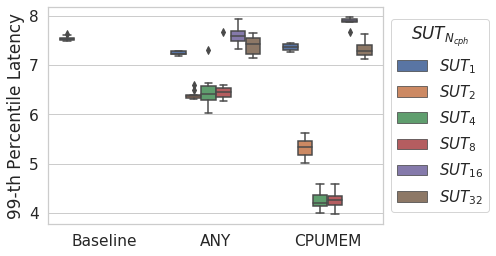

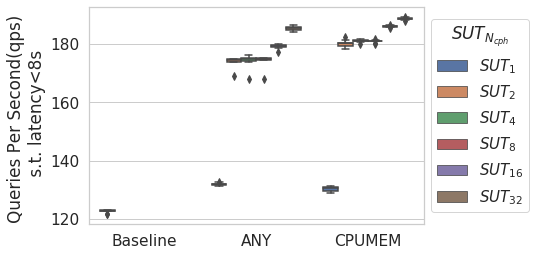

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF
from reportlab.pdfgen import canvas

from numpy import percentile, mean, std
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode, iplot

import plotly.io as pio
pio.templates.default = "none"
# pio.templates.default = "simple_white"

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
# import plotly.express as px

# import seaborn library
import seaborn as sns
legend=['$SUT_{1}$','$SUT_{2}$','$SUT_{4}$','$SUT_{8}$','$SUT_{16}$','$SUT_{32}$']
color=["blue","green","yellow","red","orange","grey"]
ylabel=['99-th Percentile Latency','Queries Per Second(qps) \n s.t. latency<8s']

label=0
for x in ['p99','qps']:
#     for cbatch in [1]:
        for model_name in ['resnet']:
            list_traces = []
            for env in ['baseline','none','cpumemory']:
    #             for numctn in [1,2,4,8,16,32]: 
                dfg_bench = dfg[(dfg['benchmark']== model_name)  & \
    #                             (dfg['numctn']==numctn) &\
                            ((dfg['k8senv']==env))]
    #                          |\
    #                          (dfg['k8senv']=='cpumem')| (dfg['k8senv']=='cpumemory'))]
#                 print(dfg_bench)
                list_traces.append(dfg_bench)
            dfall = pd.concat(list_traces, axis=0, ignore_index=True)
            ax = sns.boxplot(x = dfall['k8senv'],
                        y = dfall[x],
                        hue = dfall['numctn'])
            handles, _ = ax.get_legend_handles_labels()
            ax.legend(handles, legend, prop={'size': 15}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5))
#             plt.legend(legend,prop={'size': 16}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5) )
            ax.set_xticklabels(["Baseline","ANY","CPUMEM"])
            plt.xlabel("")
            plt.ylabel(ylabel[label])
            label=label+1
            plt.savefig('ms-metric'+x+'.pdf',bbox_inches='tight')  
            plt.show()


In [34]:
df=dfg
df

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,reps,qps,mean,p50,p80,p90,p95,p99,p999
0,resnet,none,32,1,multistream,5,1,131.747622,5.438948,6.584473,6.836526,6.933924,7.039861,7.237967,7.639549
1,resnet,none,32,1,multistream,5,2,131.275597,5.460031,6.611561,6.863007,6.961761,7.047217,7.281839,7.737416
2,resnet,none,32,1,multistream,5,3,132.139958,5.392992,6.574341,6.791528,6.900762,7.008712,7.272267,7.566048
3,resnet,none,32,1,multistream,5,4,131.665611,5.370894,6.562996,6.851546,6.954851,7.046648,7.209966,7.447679
4,resnet,none,32,1,multistream,5,5,131.300845,5.423287,6.639784,6.846725,6.958739,7.036265,7.285340,7.562280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,resnet,baseline,32,1,multistream,5,6,122.782741,6.173106,7.212115,7.338102,7.393973,7.436714,7.508814,7.613221
126,resnet,baseline,32,1,multistream,5,7,123.093294,6.162890,7.203187,7.316858,7.361215,7.401938,7.486017,7.568491
127,resnet,baseline,32,1,multistream,5,8,121.775884,6.256416,7.287389,7.423741,7.479168,7.520901,7.615292,7.680708
128,resnet,baseline,32,1,multistream,5,9,122.779661,6.188820,7.239910,7.361619,7.414182,7.457288,7.534334,7.603153


In [35]:
from numpy import percentile, median, std

l_gb = ['benchmark', 'k8senv', 'sbatch','numctn','cscenario','cbatch']

df_results = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for senario in df_bench.k8senv.unique():
            df_senario = df_bench[df_bench.k8senv == senario]
            df_base=df_senario[df_senario.numctn == 1]
            base=median(df_base['qps'])
            print(base)
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'model_time_median' : median(x['qps']),
                  'increment' : (median(x['qps'])-base)/base,
              })).reset_index()
            df_results.append(df_senario)

132.04710194383836
130.54933016259557
122.78120114024368


In [36]:
df_results = pd.concat(df_results, axis=0)
df_results

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,model_time_median,increment
0,resnet,none,32,1,multistream,5,132.047102,0.000000
1,resnet,none,32,2,multistream,6,174.498851,0.321489
2,resnet,none,32,4,multistream,6,174.950544,0.324910
3,resnet,none,32,8,multistream,6,174.778075,0.323604
4,resnet,none,32,16,multistream,7,179.346722,0.358203
5,resnet,none,32,32,multistream,7,185.399103,0.404038
0,resnet,cpumemory,32,1,multistream,5,130.549330,0.000000
1,resnet,cpumemory,32,2,multistream,6,180.403345,0.381879
2,resnet,cpumemory,32,4,multistream,6,181.150406,0.387601
3,resnet,cpumemory,32,8,multistream,6,180.907420,0.385740


In [37]:
from numpy import percentile, median, std

l_gb = ['benchmark', 'k8senv', 'sbatch','numctn','cscenario','cbatch','model_time_median','increment']

df_results1 = []

for ctn in df_results.numctn.unique():
    df_senario = df_results[df_results.numctn == ctn]
    df_base=df_senario[df_senario.k8senv == 'none']
    base=float(df_base['model_time_median'])
    print(base)
    df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
          'affinity' : (float(x['model_time_median'])-base)/base,
      })).reset_index()
    df_results1.append(df_senario)

df_results1 = pd.concat(df_results1, axis=0)
df_results1

132.04710194383836
174.4988507164209
174.9505440862908
174.77807467591705
179.34672226295396
185.39910331324143


,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,model_time_median,increment,affinity
0,resnet,none,32,1,multistream,5,132.047102,0.000000,0.000000
1,resnet,cpumemory,32,1,multistream,5,130.549330,0.000000,-0.011343
2,resnet,baseline,32,1,multistream,5,122.781201,0.000000,-0.070171
0,resnet,none,32,2,multistream,6,174.498851,0.321489,0.000000
1,resnet,cpumemory,32,2,multistream,6,180.403345,0.381879,0.033837
0,resnet,none,32,4,multistream,6,174.950544,0.324910,0.000000
1,resnet,cpumemory,32,4,multistream,6,181.150406,0.387601,0.035438
0,resnet,none,32,8,multistream,6,174.778075,0.323604,0.000000
1,resnet,cpumemory,32,8,multistream,6,180.907420,0.385740,0.035069
0,resnet,none,32,16,multistream,7,179.346722,0.358203,0.000000


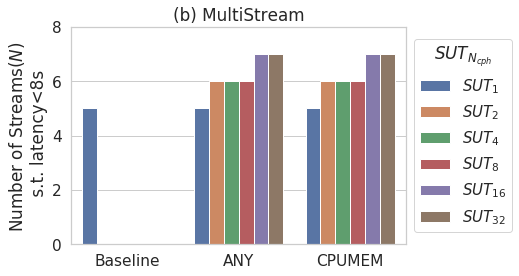

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF
from reportlab.pdfgen import canvas

from numpy import percentile, mean, std
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode, iplot

import plotly.io as pio
pio.templates.default = "none"
# pio.templates.default = "simple_white"

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
# import plotly.express as px

# import seaborn library
import seaborn as sns
legend=['$SUT_{1}$','$SUT_{2}$','$SUT_{4}$','$SUT_{8}$','$SUT_{16}$','$SUT_{32}$']
color=["blue","green","yellow","red","orange","grey"]

for x in ['qps']:
#     for cbatch in [1]:
        for model_name in ['resnet']:
            list_traces = []
            for env in ['baseline','none','cpumemory']:
    #             for numctn in [1,2,4,8,16,32]: 
                dfg_bench = dfg[(dfg['benchmark']== model_name)  & \
    #                             (dfg['numctn']==numctn) &\
                            ((dfg['k8senv']==env))]
    #                          |\
    #                          (dfg['k8senv']=='cpumem')| (dfg['k8senv']=='cpumemory'))]
    #                 print(dfg_bench)
                list_traces.append(dfg_bench)
            dfall = pd.concat(list_traces, axis=0, ignore_index=True)
            ax = sns.barplot(x = dfall['k8senv'],
                        y = dfall['cbatch'],
                        hue = dfall['numctn'])
            handles, _ = ax.get_legend_handles_labels()
            ax.legend(handles, legend, prop={'size': 15}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5))
#             plt.legend(legend,prop={'size': 16}, title = '$SUT_{N_{cph}}$',loc='center left', bbox_to_anchor=(1, 0.5) )
            ax.set_xticklabels(["Baseline","ANY","CPUMEM"])
            ax.set(ylim=(0, 8))  
            plt.xlabel("")
            plt.ylabel("Number of Streams($N$) \n s.t. latency<8s")
            plt.title("(b) MultiStream")
            plt.savefig('ms-metric.pdf',bbox_inches='tight')  
            plt.show()


In [9]:
# BINS=12
# color=["blue","green","yellow","red","orange","grey"]
# SCEN=[
#     'none-resnet-1-32-MS-1-1',
#       'none-resnet-2-32-MS-1-1',
#             'none-resnet-4-32-MS-1-1',
#            'none-resnet-8-32-MS-1-1',
#       'none-resnet-16-32-MS-1-1',
#       'none-resnet-32-32-MS-1-1'
# ]
# x=0
# for add in SCEN:
#     df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
#     df1 = df[df["name"].isin(["IssueQuery"])]
#     print(df1)
# #     ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# #     ax.set_title('IssueQuery duration (usec)');
# #     x=x+1
# #     plt.show()

# # df1['delta'].describe()

In [55]:
# # for SingleStream
# if True:
#     df1 = df[df["name"].isin(["QuerySamplesComplete"])]
#     ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
#     ax.set_title('Inference time (usec)');
#     plt.show()
#     ax = df1['dur'].plot(figsize=figsize)
#     ax.set(ylim=(0, 600))
#     ax.set_title('Individual inference time (usec)');

In [56]:
# BINS=12
# color=["blue","green","yellow","red","orange","grey"]
# for batch in ['1']:
#     SCEN=[
#     'none-resnet-1-32-MS-1-1',
#       'none-resnet-2-32-MS-1-1',
#             'none-resnet-4-32-MS-1-1',
#            'none-resnet-8-32-MS-1-1',
#       'none-resnet-16-32-MS-1-1',
#       'none-resnet-32-32-MS-1-1'
# ]
#     x=0
#     for add in SCEN:
#         df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
#         df1 = df[df["name"].isin(["QuerySamplesComplete"])]
#         print(max(df1['dur']))
#         print(np.median(df1['dur']))
#         print(np.mean(df1['dur']))
#     #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
#     #     ax.set_title('Inference time (usec)');
#     #     x = x+1
#     #     plt.show()

#         # Draw the density plot
#         sns.distplot(df1['dur'], hist = False, kde = True,
#                      kde_kws = {'linewidth': 3},
#                      label = SCEN[x])
#         x=x+1

#     # Plot formatting
#     plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
#     plt.title('Inference time (usec) -- batch'+str(batch))
#     plt.xlabel('time (usec)')
#     plt.ylabel('Density')
#     plt.show()

In [57]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
for batch in ['1']:
    SCEN=[
    'none-resnet-1-32-MS-5-1',
      'none-resnet-2-32-MS-6-1',
            'none-resnet-4-32-MS-6-1',
           'none-resnet-8-32-MS-6-1',
      'none-resnet-16-32-MS-7-1',
'none-resnet-32-32-MS-7-1'
]
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Sample"])]
        print(max(df1['issue_to_done']))
        print(np.median(df1['issue_to_done']))
        print(np.mean(df1['issue_to_done']))
    #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
    #     ax.set_title('Inference time (usec)');
    #     x = x+1
    #     plt.show()

        # Draw the density plot
        sns.distplot(df1['issue_to_done'], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = SCEN[x])
        x=x+1

    # Plot formatting
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.title('Inference time (usec) -- batch'+str(batch))
    plt.xlabel('time (usec)')
    plt.ylabel('Density')
    plt.show()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-1-32-MS-5-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>


JSONDecodeError: Expecting ',' delimiter: line 5 column 97 (char 395)

In [34]:
# BINS=12
# color=["blue","green","yellow","red","orange","grey"]
# for batch in ['32']:
#     SCEN=[
#     'none-resnet-1-32-MS-1-1',
#       'none-resnet-2-32-MS-1-1',
#             'none-resnet-4-32-MS-1-1',
#            'none-resnet-8-32-MS-1-1',
#       'none-resnet-16-32-MS-1-1',
#       'none-resnet-32-32-MS-1-1'
# ]
#     x=0
#     for add in SCEN:
#         df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
#         df1 = df[df["name"].isin(["QuerySamplesComplete"])]
#         df1.reset_index(drop=True,inplace=True)
#         ax = df1['dur'].plot(figsize=figsize, color=color[x],label = SCEN[x])
#         ax.set_title('Individual inference time (usec)');
#         ax.set(ylim=(0, 150))
#         x=x+1
#     plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
#     plt.show()
#     plt.xlabel('#QuerySamples')

In [536]:
df1 = df[df["name"].isin(["Sample"])]
len(df1)

24576

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2-baseline/none-resnet-1-32-MS-5-2/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
10000
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-1-32-MS-5-2/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
10000
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-2-32-MS-6-2/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
12000
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-4-32-MS-6-2/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
12000
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resnet-8-32-MS-6-2/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
12000
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/none-resn

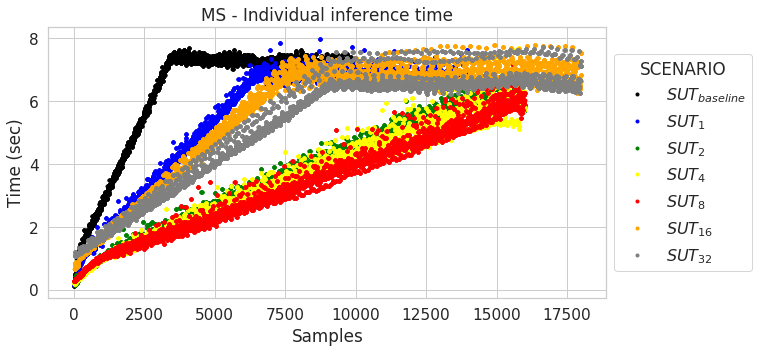

In [32]:
BINS=12
color=["black","blue","green","yellow","red","orange","grey","blue","green","yellow","red","orange","grey",]
# legend=["baseline","ANY-1ctn","ANY-2ctn","ANY-4ctn","ANY-8ctn","ANY-16ctn","ANY-32ctn"]
legend=['$SUT_{baseline}$','$SUT_{1}$','$SUT_{2}$','$SUT_{4}$','$SUT_{8}$','$SUT_{16}$','$SUT_{32}$']
for batch in ['1']:
    SCEN=[
    'none-resnet-1-32-MS-5-2',
      'none-resnet-2-32-MS-6-2',
            'none-resnet-4-32-MS-6-2',
           'none-resnet-8-32-MS-6-2',
      'none-resnet-16-32-MS-7-2',
'none-resnet-32-32-MS-7-2'
]
    x=0
    df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2-baseline/none-resnet-1-32-MS-5-2/mlperf_log_trace.json")
    df1 = df[df["name"].isin(["Sample"])]
    df1.reset_index(drop=True,inplace=True)
    print(len(df1))
    ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],marker='.',linestyle='none',label = legend[x])
    x=x+1
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Sample"])]
        print(len(df1))
#         df1.reset_index(drop=True,inplace=True)
  
        ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x],marker='.', linestyle='none')
#         df1['issue_start_ns'] =  df1['issue_start_ns'] / 1e9
#         ax = df1['issue_start_ns'].plot(figsize=figsize, color=color[x],label = SCEN[x],marker='.', linestyle='none')
        ax.set_title('Individual inference time (usec)');
#         ax.set(xlim=(0, 5000))
        x=x+1
    ax.set_title('MS - Individual inference time');
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.xlabel('Samples')
    plt.ylabel('Time (sec)')
    plt.savefig('ms-iit-none.png',bbox_inches='tight') 
    plt.show()
#     plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
#     plt.show()
#     plt.xlabel('#QuerySamples')

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2-baseline/none-resnet-1-32-MS-5-2/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
10000
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/cpumemory-resnet-1-32-MS-5-2/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
10000
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/cpumemory-resnet-2-32-MS-6-2/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
12000
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/cpumemory-resnet-4-32-MS-6-2/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
12000
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/cpumemory-resnet-8-32-MS-6-2/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
12000
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_dete

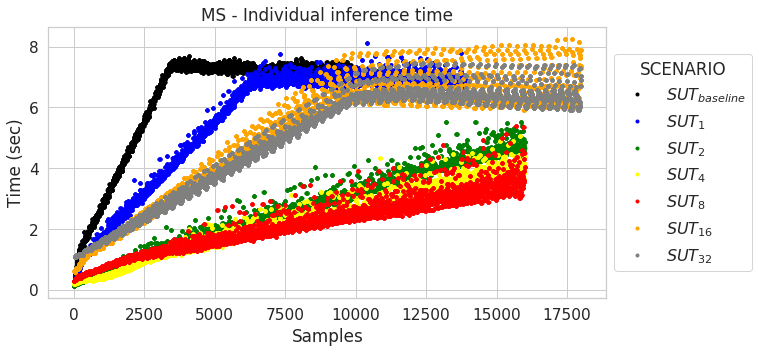

In [33]:
BINS=12
color=["black","blue","green","yellow","red","orange","grey","blue","green","yellow","red","orange","grey",]
# legend=["baseline","ANY-1ctn","ANY-2ctn","ANY-4ctn","ANY-8ctn","ANY-16ctn","ANY-32ctn"]
legend=['$SUT_{baseline}$','$SUT_{1}$','$SUT_{2}$','$SUT_{4}$','$SUT_{8}$','$SUT_{16}$','$SUT_{32}$']
for batch in ['1']:
    SCEN=[
    'cpumemory-resnet-1-32-MS-5-2',
      'cpumemory-resnet-2-32-MS-6-2',
            'cpumemory-resnet-4-32-MS-6-2',
           'cpumemory-resnet-8-32-MS-6-2',
      'cpumemory-resnet-16-32-MS-7-2',
'cpumemory-resnet-32-32-MS-7-2'
]
    x=0
    df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2-baseline/none-resnet-1-32-MS-5-2/mlperf_log_trace.json")
    df1 = df[df["name"].isin(["Sample"])]
    df1.reset_index(drop=True,inplace=True)
    print(len(df1))
    ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],marker='.',linestyle='none',label = legend[x])
    x=x+1
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp2/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["Sample"])]
        print(len(df1))
#         df1.reset_index(drop=True,inplace=True)
  
        ax = df1['issue_to_done'].plot(figsize=figsize, color=color[x],label = legend[x],marker='.', linestyle='none')
#         df1['issue_start_ns'] =  df1['issue_start_ns'] / 1e9
#         ax = df1['issue_start_ns'].plot(figsize=figsize, color=color[x],label = SCEN[x],marker='.', linestyle='none')
        ax.set_title('Individual inference time (usec)');
#         ax.set(xlim=(0, 5000))
        x=x+1
    ax.set_title('MS - Individual inference time');
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.xlabel('Samples')
    plt.ylabel('Time (sec)')
    plt.savefig('ms-iit-cpumem.png',bbox_inches='tight') 
    plt.show()
#     plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
#     plt.show()
#     plt.xlabel('#QuerySamples')

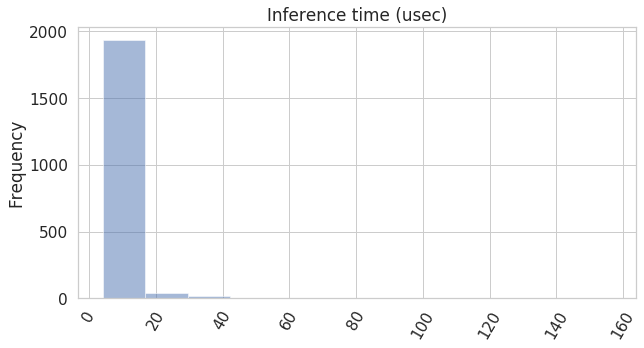

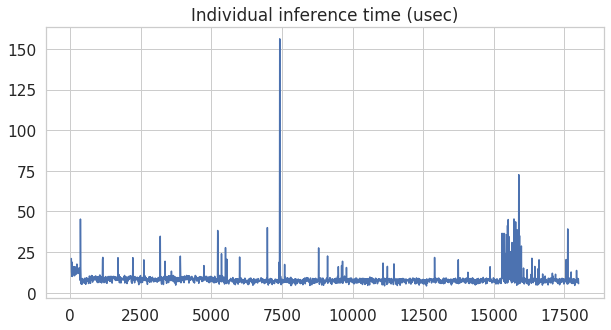

In [30]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Inference time (usec)');
#ax.set(xlim=(0, 25000))
plt.xticks(rotation=60)
plt.show()

ax = df1['dur'].plot(figsize=figsize)
ax.set_title('Individual inference time (usec)');
#ax.set(ylim=(0, 200))
plt.show()


# df1['issue_to_done'].describe()

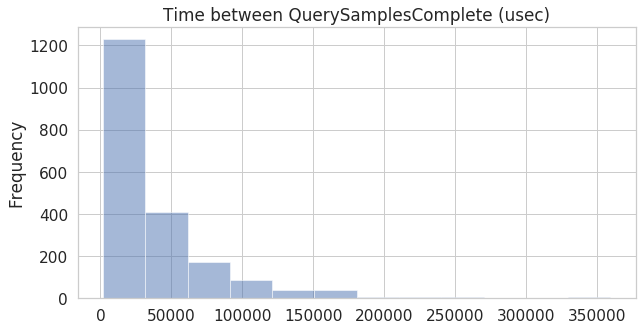

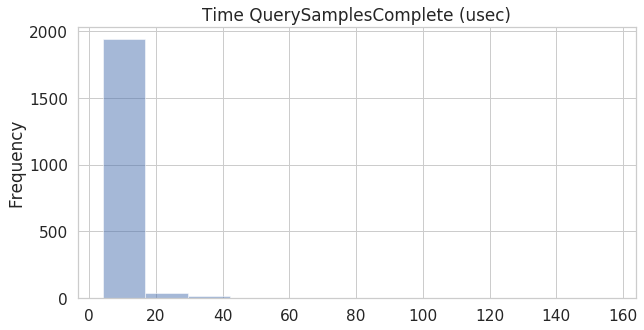

In [29]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1['delta'] = df1['ts'].diff()
ax = df1['delta'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time between QuerySamplesComplete (usec)');
plt.show()

ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time QuerySamplesComplete (usec)');